In [1]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_dir = '../data/internet/'
whle_dir = data_dir + 'ph_internet_whole/ph_mobileinternet_whole.shp'
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'

In [3]:
ph_mobile_tiles = gp.read_file(whle_dir).to_crs('+proj=cea')

centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')
centroids_.sort_values('DHSCLUST', inplace=True)

In [28]:
ph_mobile_tiles['avg_d_kbps'].max()

305310

In [4]:
ph_mobile_tiles.set_geometry(ph_mobile_tiles.geometry.centroid, inplace=True)
centroids_.set_geometry(centroids_.geometry.centroid, inplace=True)

In [6]:
#distance_set = []
#for i in centroid_pts[10:30]:
    #distances = []
    #for j in internet_pts:
        #distances.append(i.distance(j) <= 5000)
    #distance_set.append(distances)

#surrounding_pts = []
#for ind, i in enumerate(distance_set):
    #surrounding_pts.append(internet_pts[distance_set[ind]])
#ave_speed_per_cluster = []
#for i in surrounding_pts:
    #speeds = []
    #for _ in i:
        #speeds.append(ph_mobile_tiles[ph_mobile_tiles.geometry == _]['avg_d_kbps'].item())
    #ave_speed_per_cluster.append(np.mean(speeds))

In [ ]:

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
for i in len(range(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_mobile_tiles, buffers_test, how='inner', op='within')
    intpoint_test.plot(ax=ax, color='purple', alpha=0.1)

In [5]:
from scipy.stats import skew, kurtosis
def summary_stat(series_, mean_arr, max_arr, min_arr, std_arr, median_arr, skew_arr, cov_arr, kurtosis_arr):
    
    mean_arr.append(np.mean(series_))
    max_arr.append(np.max(series_))
    min_arr.append(np.min(series_))
    std_arr.append(np.std(series_))
    median_arr.append(np.median(series_))
    skew_arr.append(skew(series_))
    cov_arr.append(np.cov(series_))
    kurtosis_arr.append(kurtosis(series_))

In [6]:
# fig, ax = plt.subplots(figsize=(100,100))
# ph_mobile_tiles.plot(ax=ax)
# centroids_.plot(ax=ax)

avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis = [], [], [], [], [], [], [], []

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
datapoints_per_cluster = []
for i in range(len(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_mobile_tiles, buffers_test, how='inner', op='within')
    # intpoint_test.plot(ax=ax, color='purple', alpha=0.1)
    summary_stat(intpoint_test.avg_d_kbps, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_u_kbps, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_lat_ms, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis)
    datapoints_per_cluster.append(intpoint_test.shape[0])

with_no_data = 0
for i in datapoints_per_cluster:
    with_no_data = with_no_data + 1 if i == 0 else with_no_data
print('The number of points without data is {}, and the number of points with data is {}'.format(with_no_data, len(datapoints_per_cluster) - with_no_data))

# centroids_[:10].plot(ax=ax, color='red')


# buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
# data_in_buffers = gp.sjoin(ph_mobile_tiles, buffers_, how='inner', op='within')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_20856/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = 

The number of points without data is 167, and the number of points with data is 1047


C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_20856/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramDat

### Save the Summary Statistics as DataFrames

In [7]:
dhsclust = list(centroids_.DHSCLUST)

avg_d_kbps_summary_stats = [dhsclust, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_d_kbps_summary_stats = pd.DataFrame(avg_d_kbps_summary_stats).transpose()
avg_d_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

avg_u_kbps_summary_stats = [dhsclust, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_u_kbps_summary_stats = pd.DataFrame(avg_u_kbps_summary_stats).transpose()
avg_u_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']


avg_lat_ms_summary_stats = [dhsclust, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis, datapoints_per_cluster]
avg_lat_ms_summary_stats = pd.DataFrame(avg_lat_ms_summary_stats).transpose()
avg_lat_ms_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

In [8]:
avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/mobile_download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/mobile_upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/mobile_latency_summary_stats.csv')

### Load Summary Statistics

In [9]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_latency_summary_stats.csv')

### Summary Statistics On Mean Values (among Clusters)

Average National Download Speed : 11.78 Mbps
Median of National Download Speed : 10.51 Mbps
Maximum National Download Speed : 99.65 Mbps
Minimum National Download Speed : 0.17 Mbps
Standard Deviation of National Download Speed : 7.23


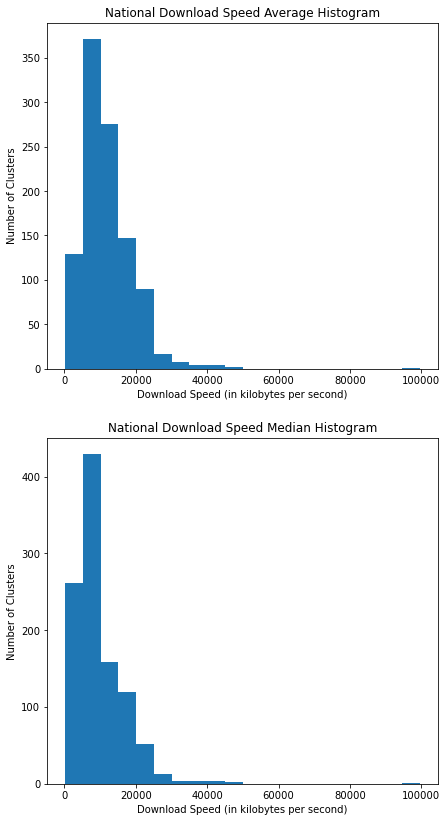

In [10]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in kilobytes per second)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_d_kbps_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in kilobytes per second)'); _ = ax[1].set_ylabel('Number of Clusters')

Average National Upload Speed : 6.26 Mbps
Median of National Upload Speed : 6.05 Mbps
Maximum National Upload Speed : 32.16 Mbps
Minimum National Upload Speed : 0.02 Mbps
Standard Deviation of National Upload Speed : 2.99


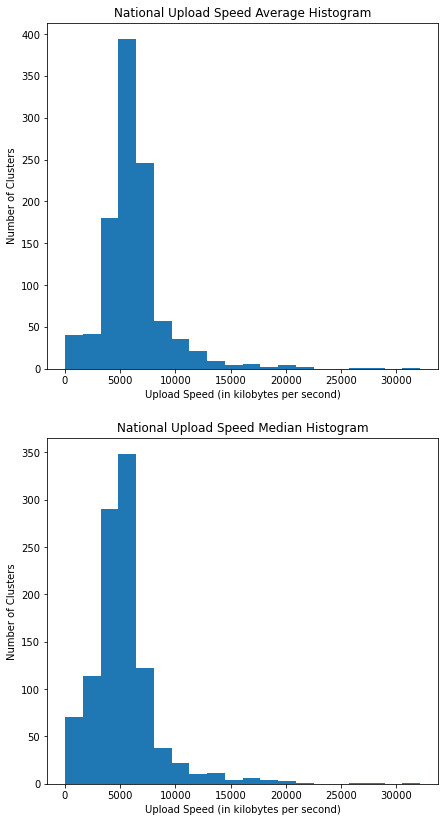

In [11]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in kilobytes per second)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in kilobytes per second)'); _ = ax[1].set_ylabel('Number of Clusters')

Average National Latency : 50.92 ms
Median of National Latency : 44.85 ms
Maximum National Latency : 872.00 ms
Minimum National Latency : 13.00 ms
Standard Deviation of National Latency : 45.52


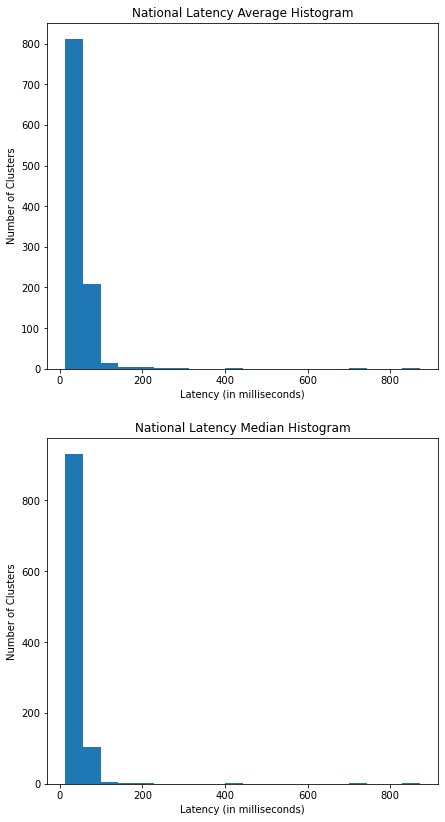

In [12]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Number of Clusters')

Average Number of Datapoints : 44.25 Points
Median Number of Datapoints : 11.00 Points
Maximum Number of Datapoints : 228.00 Points
Minimum Number of Datapoints : 0.00 Points
Standard Deviation of Number of Datapoints : 64.12


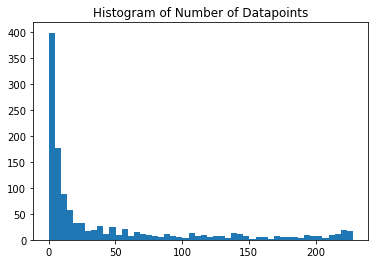

In [13]:
datapoints_per_cluster = list(avg_d_kbps_summary_stats['Number of Datapoints'])

print('Average Number of Datapoints : {:.2f} Points'.format(np.mean(datapoints_per_cluster)))
print('Median Number of Datapoints : {:.2f} Points'.format(np.median(datapoints_per_cluster)))
print('Maximum Number of Datapoints : {:.2f} Points'.format(max(datapoints_per_cluster)))
print('Minimum Number of Datapoints : {:.2f} Points'.format(min(datapoints_per_cluster)))
print('Standard Deviation of Number of Datapoints : {:.2f}'.format(np.std(datapoints_per_cluster)))
_ = plt.hist(datapoints_per_cluster, bins=50)
_ = plt.title('Histogram of Number of Datapoints')

### Plotting Mean Download Speeds

<AxesSubplot:>

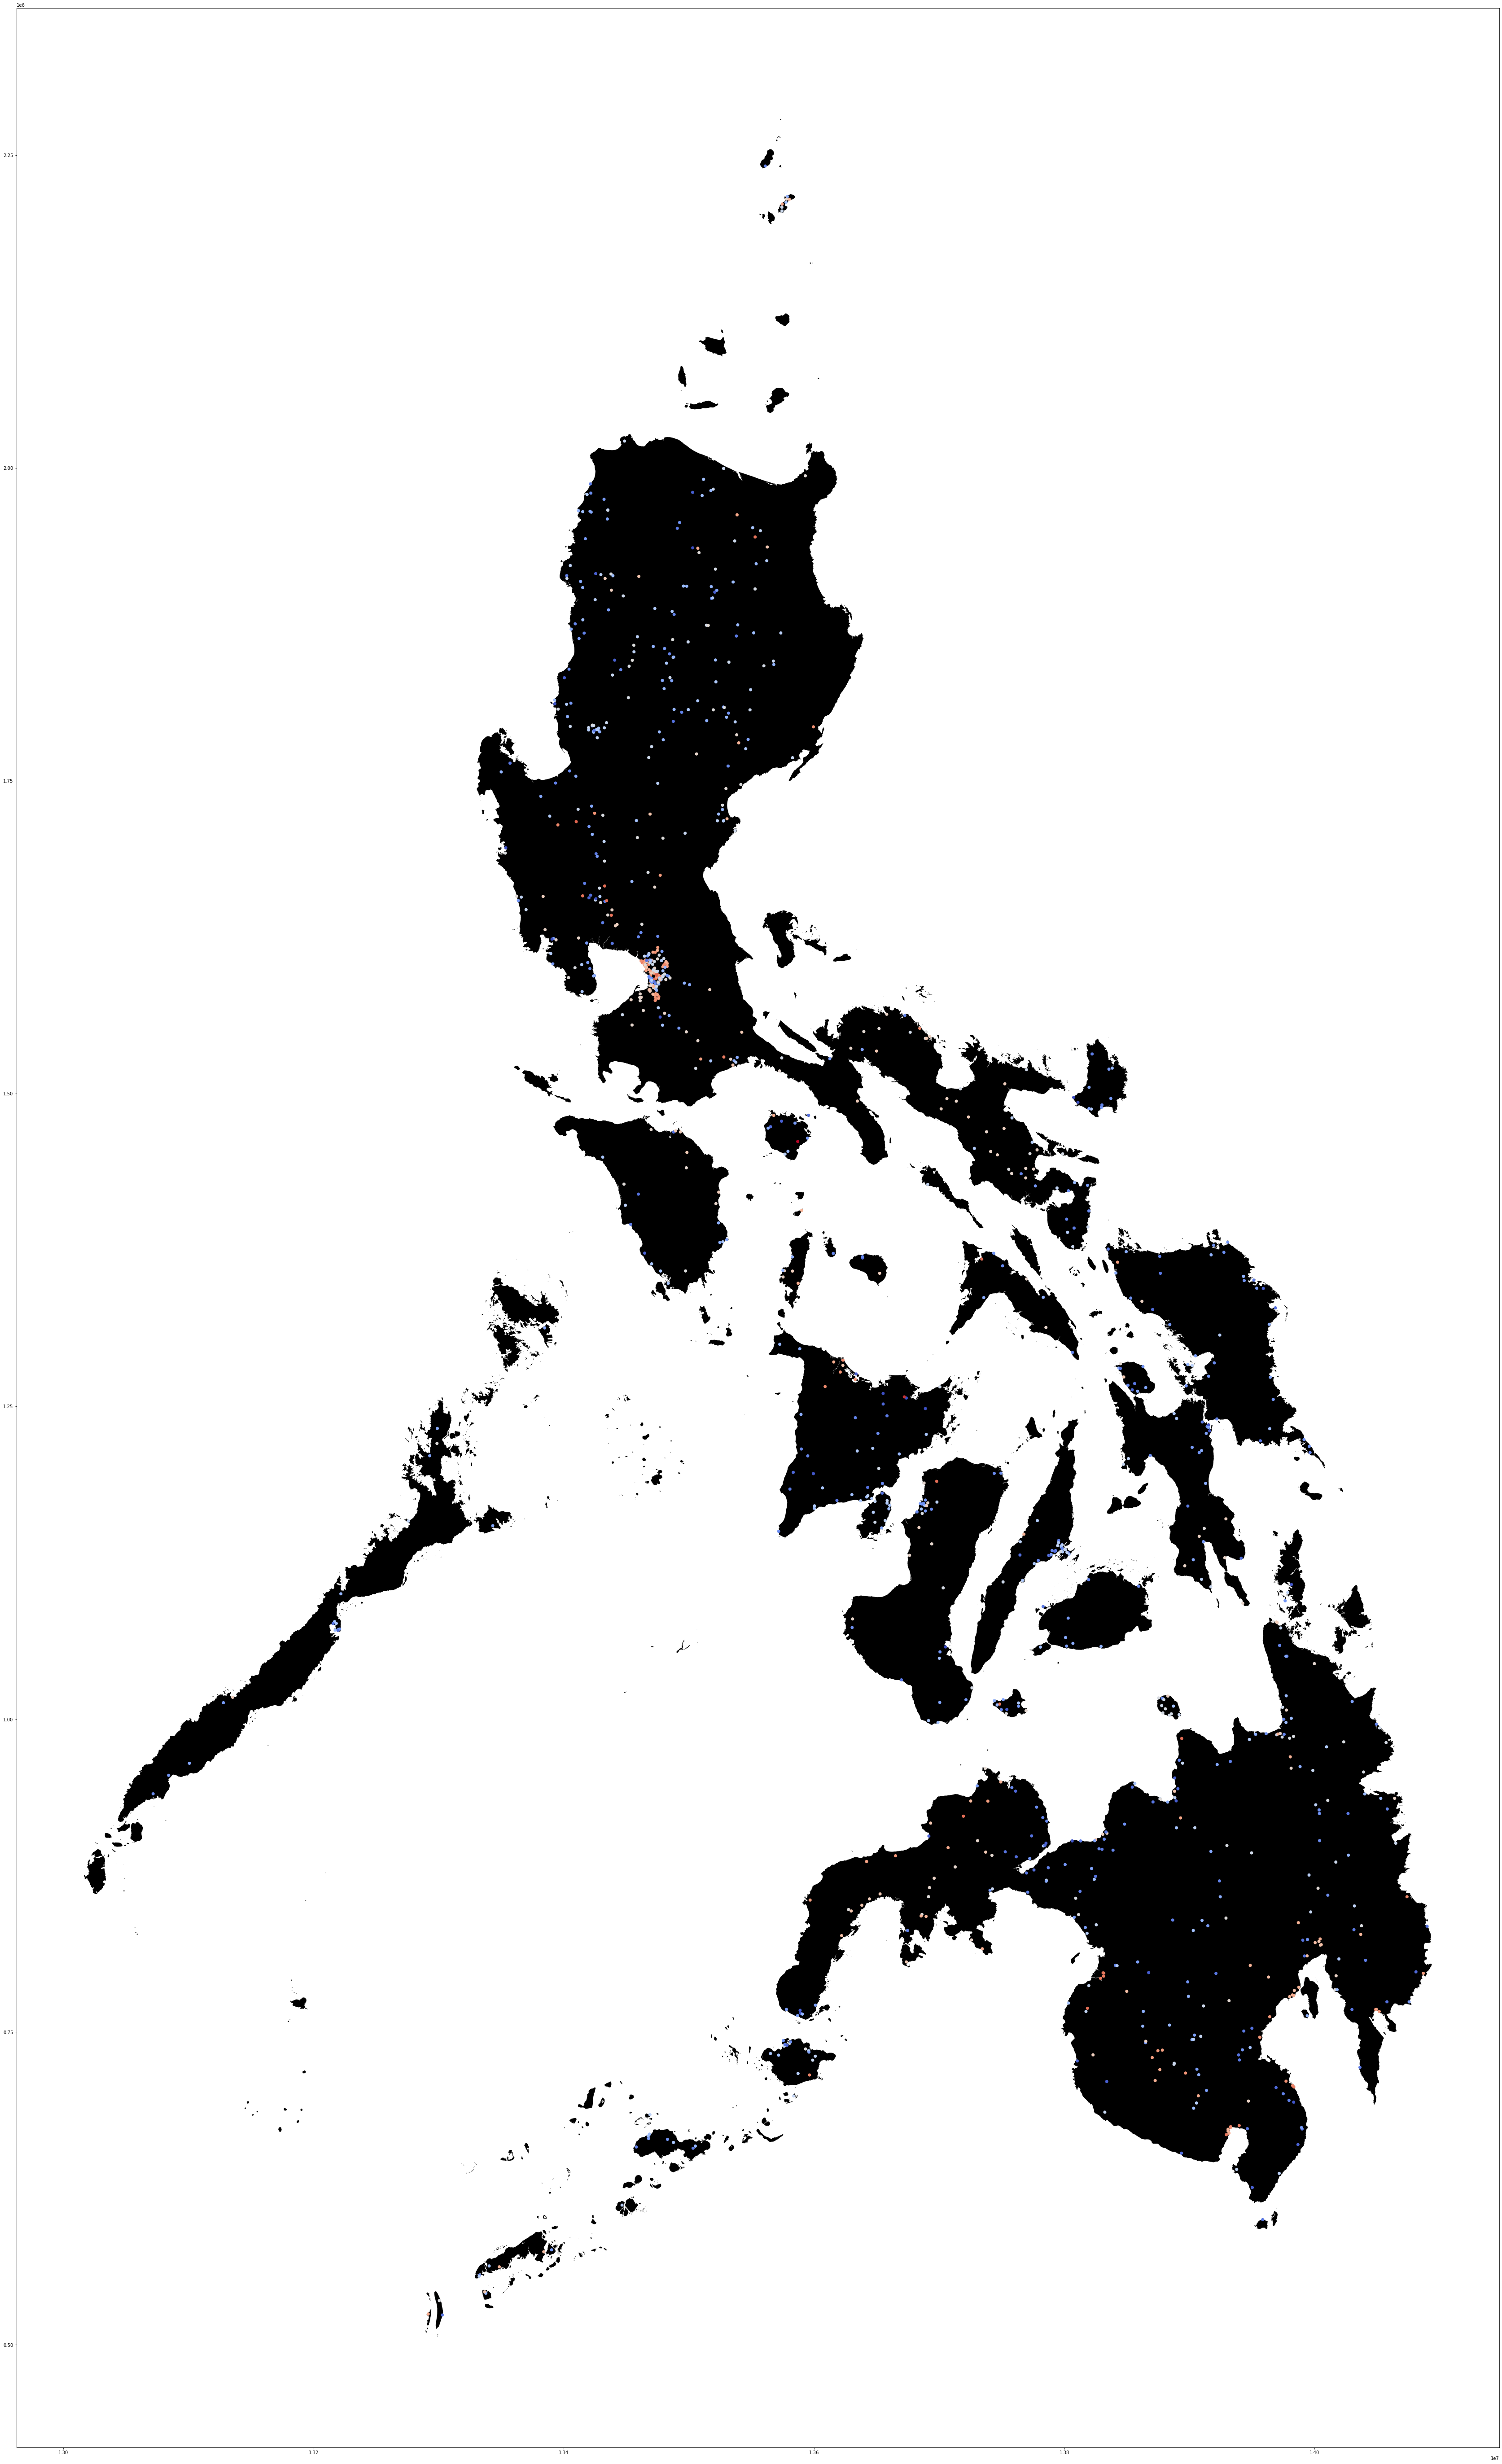

In [58]:
fig, ax = plt.subplots(figsize=(100, 100))

whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
whole_ph = gp.read_file(whole_ph_dir).to_crs('+proj=cea')
whole_ph.plot(ax=ax, color='black')

_ = gp.GeoDataFrame(avg_d_kbps_cluster_mean, geometry=centroids_.geometry)
_.plot(ax=ax, column=0, cmap='coolwarm', legend=False, alpha=1)

### Imputation

In [14]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_20856/843634493.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [15]:
avg_d_kbps_summary_stats['Mean'].fillna(min(avg_d_kbps_summary_stats['Mean']), inplace=True)
avg_d_kbps_summary_stats['Minimum'].fillna(min(avg_d_kbps_summary_stats['Minimum']), inplace=True)
avg_d_kbps_summary_stats['Maximum'].fillna(min(avg_d_kbps_summary_stats['Maximum']), inplace=True)
avg_d_kbps_summary_stats['Median'].fillna(min(avg_d_kbps_summary_stats['Median']), inplace=True)
avg_d_kbps_summary_stats['Skew'].fillna(min(avg_d_kbps_summary_stats['Skew']), inplace=True)
avg_d_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_d_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_d_kbps_summary_stats['Kurtosis'].fillna(min(avg_d_kbps_summary_stats['Kurtosis']), inplace=True)
avg_d_kbps_summary_stats['Standard Deviation'].fillna(max(avg_d_kbps_summary_stats['Standard Deviation']), inplace=True)

avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_mobile_download_speeds_summary_stats.csv')

Average National Download Speed : 10.18 Mbps
Median of National Download Speed : 9.20 Mbps
Maximum National Download Speed : 99.65 Mbps
Minimum National Download Speed : 0.17 Mbps
Standard Deviation of National Download Speed : 7.81


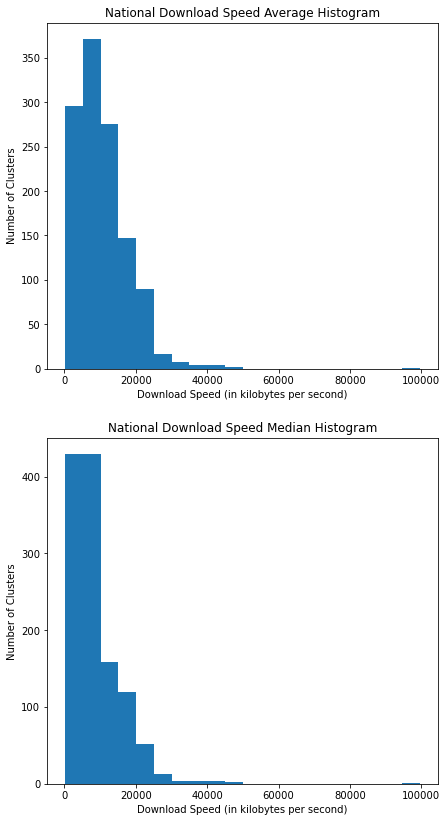

In [16]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in kilobytes per second)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_d_kbps_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in kilobytes per second)'); _ = ax[1].set_ylabel('Number of Clusters')

In [17]:
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_20856/2830917344.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [18]:
avg_u_kbps_summary_stats['Mean'].fillna(min(avg_u_kbps_summary_stats['Mean']), inplace=True)
avg_u_kbps_summary_stats['Minimum'].fillna(min(avg_u_kbps_summary_stats['Minimum']), inplace=True)
avg_u_kbps_summary_stats['Maximum'].fillna(min(avg_u_kbps_summary_stats['Maximum']), inplace=True)
avg_u_kbps_summary_stats['Median'].fillna(min(avg_u_kbps_summary_stats['Median']), inplace=True)
avg_u_kbps_summary_stats['Skew'].fillna(min(avg_u_kbps_summary_stats['Skew']), inplace=True)
avg_u_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_u_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_u_kbps_summary_stats['Kurtosis'].fillna(min(avg_u_kbps_summary_stats['Kurtosis']), inplace=True)
avg_u_kbps_summary_stats['Standard Deviation'].fillna(max(avg_u_kbps_summary_stats['Standard Deviation']), inplace=True)

avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_mobile_upload_speeds_summary_stats.csv')

Average National Upload Speed : 5.40 Mbps
Median of National Upload Speed : 5.67 Mbps
Maximum National Upload Speed : 32.16 Mbps
Minimum National Upload Speed : 0.02 Mbps
Standard Deviation of National Upload Speed : 3.51


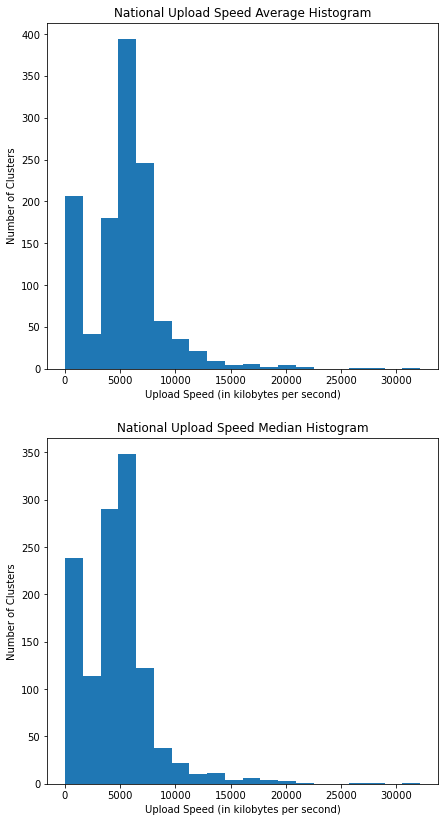

In [19]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in kilobytes per second)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in kilobytes per second)'); _ = ax[1].set_ylabel('Number of Clusters')

In [20]:
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_latency_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_20856/3012658294.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/mobile_latency_summary_stats.csv').drop('Unnamed: 0', 1)


In [21]:
avg_lat_ms_summary_stats['Mean'].fillna(max(avg_lat_ms_summary_stats['Mean']), inplace=True)
avg_lat_ms_summary_stats['Minimum'].fillna(max(avg_lat_ms_summary_stats['Minimum']), inplace=True)
avg_lat_ms_summary_stats['Maximum'].fillna(max(avg_lat_ms_summary_stats['Maximum']), inplace=True)
avg_lat_ms_summary_stats['Median'].fillna(max(avg_lat_ms_summary_stats['Median']), inplace=True)
avg_lat_ms_summary_stats['Skew'].fillna(max(avg_lat_ms_summary_stats['Skew']), inplace=True)
avg_lat_ms_summary_stats['Coefficient of Variation'].fillna(max(avg_lat_ms_summary_stats['Coefficient of Variation']), inplace=True)
avg_lat_ms_summary_stats['Kurtosis'].fillna(max(avg_lat_ms_summary_stats['Kurtosis']), inplace=True)
avg_lat_ms_summary_stats['Standard Deviation'].fillna(max(avg_lat_ms_summary_stats['Standard Deviation']), inplace=True)

avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/imputed_mobile_latency_summary_stats.csv')

Average National Latency : 163.87 ms
Median National Latency : 47.16 ms
Maximum National Latency : 872.00 ms
Minimum National Latency : 13.00 ms
Standard Deviation of National Latency : 285.95


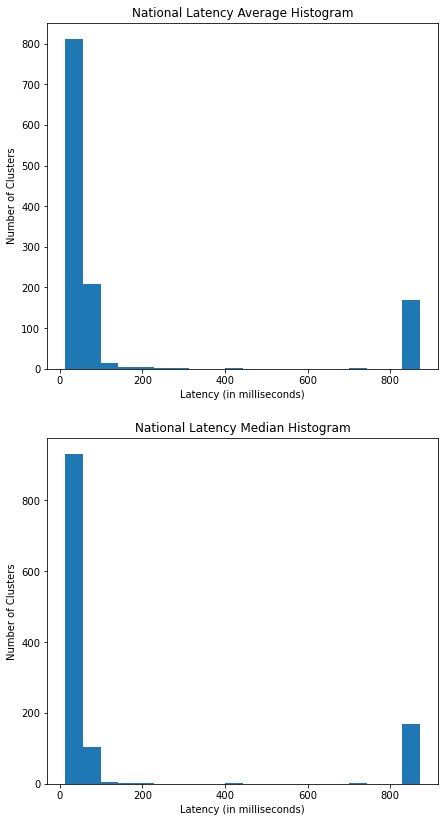

In [22]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=20)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Number of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=20)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Number of Clusters')